<center> <h1> Statistical Inference </h1> </center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
sns.set()

In [3]:
listings = pd.read_csv('listings_clean.csv', encoding = "utf-8")

In [4]:
listings.head(5)

,Unnamed: 0,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_square_feet,has_weekly_price,has_monthly_price,last_calendar_update,name_len,summary_len,space_len,description_len,neighborhood_overview_len,notes_len,transit_len,access_len,interaction_len,house_rules_len,host_about_len
0,0.0,16570521,Lands' End hideaway,Light and airy in-law with dedicated bathroom ...,"The room is on the lower level of the house, w...",Light and airy in-law with dedicated bathroom ...,The area around Lincoln Park is a residential ...,"Work is incomplete in the backyard, so this sp...","Parking is abundant, a rarity in San Francisco...",We welcome you to share our Living Room and Di...,We live full time in the home and have a home ...,This is a shoeless house and slippers are prov...,21303289,2014-09-14 00:00:00,I'm a native San Franciscan and my boyfriend i...,within an hour,False,True,True,Seacliff,House,Private room,2,1.0,1.0,1.0,Real Bed,"['TV', 'Wireless Internet', 'Indoor fireplace'...",120.0,150.0,35.0,1,0.0,4,14,15,2017-02-22 00:00:00,2017-09-04 00:00:00,9.375,10.0,10.0,8.75,8.75,10.00,10.00,False,False,moderate,False,False,2.0,2.02,False,False,False,2017-09-11 00:00:00,19.0,167.0,204.0,1000.0,465.0,743.0,353.0,318.0,411.0,586.0,325.0
1,1.0,15664146,Spacious 3 beds in convenient/safe neighborhood,My home is in one of the safest neighborhoods ...,,My home is in one of the safest neighborhoods ...,,,There is a shared (side by side) driveway that...,,,Check out is at 11 am unless otherwise agreed ...,101134145,2016-10-24 00:00:00,,within an hour,False,True,False,Seacliff,Apartment,Entire home/apt,7,2.0,3.0,5.0,Real Bed,"['TV', 'Cable TV', 'Internet', 'Wireless Inter...",295.0,500.0,150.0,3,20.0,2,18,40,2016-11-26 00:00:00,2017-09-14 00:00:00,9.000000000000002,10.0,10.0,10.0,10.00,8.75,8.75,True,True,strict,False,False,1.0,3.86,False,False,False,2017-09-11 00:00:00,47.0,402.0,1.0,545.0,1.0,1.0,142.0,1.0,1.0,50.0,1.0
2,2.0,1427660,Charming Studio Apt at Ocean Beach,"NON-SMOKING, charming, private, peaceful hidea...","This NON-SMOKING, quiet and private 1 bedroom ...","NON-SMOKING, charming, private, peaceful hidea...",I'm excited for you to discover why I love liv...,STR#26,Public transport by bus to take you anywhere i...,Guests enter and exit the private studio via m...,You decide how much socialization or privacy y...,Absolutely NO SMOKING or drugs on property - p...,2275604,2012-05-02 00:00:00,"I LOVE San Francisco!! I mean, I am IN LOVE wi...",within an hour,True,True,True,Seacliff,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"['TV', 'Cable TV', 'Internet', 'Wireless Inter...",159.0,200.0,50.0,2,10.0,2,7,332,2013-08-28 00:00:00,2017-09-26 00:00:00,9.75,10.0,10.0,10.0,10.00,10.00,10.00,True,True,flexible,False,False,1.0,6.65,False,True,False,2017-09-27 00:00:00,34.0,251.0,1000.0,1000.0,605.0,6.0,89.0,223.0,212.0,633.0,757.0
3,3.0,19745324,Super Fabulous Mansion!,Live in a mansion in the Sea Cliff neighborhoo...,This is a very large home in San Francisco's v...,Live in a mansion in the Sea Cliff neighborhoo...,"China beach, Lincoln Park, Legion of Honor, Cl...",Clement Street has some amazing restaurants - ...,"You can park in our garage, or on El Camino De...",,I live close by,Please use the house responsibly a

In [5]:
# Delete old index
del listings['Unnamed: 0']

In [6]:
listings = listings.dropna(axis=0,subset=['name_len'])

In [7]:
numerical =['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
            'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month', 'review_scores_rating', 
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
            'review_scores_location', 'review_scores_value','price','security_deposit','cleaning_fee',
            'extra_people','name_len', 'summary_len', 'space_len', 'description_len', 'neighborhood_overview_len', 
            'notes_len', 'transit_len', 'access_len', 'interaction_len', 'house_rules_len', 'host_about_len']

reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication','review_scores_location', 'review_scores_value']

for item in numerical:
    listings[item] = pd.to_numeric(listings[item])

## Significant Difference in Population

### Instant Bookable vs Price / Rating

Is the difference in ratings / price between whether a listing is instant bookable or not due to chance?

The two populations are unpaired and independent from one another, so we should use a two-sample t-test to see if the populations are significantly different from each other. We will use a significance of .05 

<a href="https://www.codecogs.com/eqnedit.php?latex=$&space;\sigma$=&space;0.05" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$&space;\sigma$=&space;0.05" title="$ \sigma$= 0.05" /></a>

The <b> Null Hyptohesis </b> is that there is no difference in the average rating / price between Instant Bookable (I) and Not-Instant Bookable (N)

$H_0 :$ ( $μ_I$ = $μ_N$) 

In [15]:
listings[['review_scores_rating','price']].describe().T

,count,mean,std,min,25%,50%,75%,max
review_scores_rating,5967.0,9.390460,0.789921,0.0,9.125,9.625,9.875,10.0
price,5967.0,210.003352,295.481605,0.0,105.000,153.000,250.000,10000.0


In [18]:
listings.groupby('instant_bookable')[['review_scores_rating','price']].agg(['mean','std'])

review_scores_rating                 price            
                                 mean       std        mean         std
instant_bookable                                                       
False                        9.428854  0.756034  218.784350  314.540744
True                         9.291916  0.863339  187.465631  238.334447

<b> Rating </b>has a mean of ~ 9.39 and a standard deviation of ~.79 for the entire population. Instant Bookable listings have a mean rating of ~9.29 and a standard deviation of ~.86, and listings that aren't instant bookable have a mean of ~9.42 and a standard deviation of ~.75

<b> Price </b> has a mean of ~\$210.00 and a standard deviation of ~\$295.48.  Instant bookable listings have a mean price of ~187.47 and a standard deviation of ~\$238.33, and listings that aren't instant bookable have a mean of ~\$218.78 and a standard deviation of ~\$314.54

In [19]:
import scipy.stats as stats
# Stats.scipy t-test for indpenedence. Variance are not equal
T, p = stats.ttest_ind(listings[listings['instant_bookable'] == 'True']['review_scores_rating'],
                       listings[listings['instant_bookable'] == 'False']['review_scores_rating'],equal_var=False)
print('Ratings')
print('Test Statistic (T):', T)
print('p-value:', p)

Ratings
Test Statistic (T): -5.69277485372
p-value: 1.38331734245e-08


In [20]:
import scipy.stats as stats
# Stats.scipy t-test for indpenedence. Variance are not equal
T, p = stats.ttest_ind(listings[listings['instant_bookable'] == 'True']['price'],
                       listings[listings['instant_bookable'] == 'False']['price'],equal_var=False)
print('Price')
print('Test Statistic (T):', T)
print('p-value:', p)

Price
Test Statistic (T): -4.14850384426
p-value: 3.41617273627e-05


We can <b> reject the null hypothesis </b> that the two populations are the same for both ratings and price, since their p-values are so low. 

It seems that adding an addition barrier to the product for the customers results in higher reviews and price. This seems counterintuitive to having higher reviews and price. There are a two reasons why I think this happens. Host that want to approve their future AirBnB customers:
     1. Really care about their property and put a lot more effort in their property. 
     2. Make a connection to their guests through the process of making sure they want to rent to them. The customers may be less likely to review lower after that personal connection.

### Business Travel Ready vs Price / Rating

In [22]:
import scipy.stats as stats
# Stats.scipy t-test for indpenedence. Variance are not equal
T, p = stats.ttest_ind(listings[listings['is_business_travel_ready'] == 'True']['review_scores_rating'],
                       listings[listings['is_business_travel_ready'] == 'False']['review_scores_rating'],equal_var=False)
print('Ratings')
print('Test Statistic (T):', T)
print('p-value:', p)

Ratings
Test Statistic (T): 16.1148983964
p-value: 6.0143276588e-57


In [21]:
import scipy.stats as stats
# Stats.scipy t-test for indpenedence. Variance are not equal
T, p = stats.ttest_ind(listings[listings['is_business_travel_ready'] == 'True']['price'],
                       listings[listings['is_business_travel_ready'] == 'False']['price'],equal_var=False)
print('Price')
print('Test Statistic (T):', T)
print('p-value:', p)

Price
Test Statistic (T): 12.0527279245
p-value: 8.10737868439e-33


We can again <b> reject the null hypothesis </b> that the two populations are the same for both ratings and price, since their p-values are so low. 

# Review Scores

There are a total of 7 types of reviews. Lets see how correlated they are with each other.

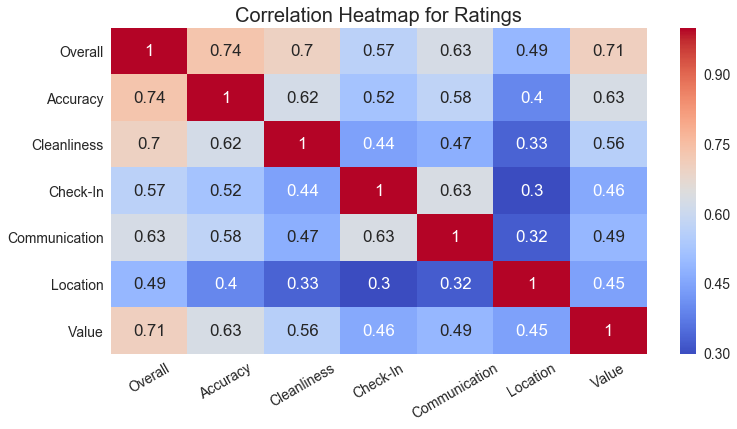

In [30]:
sns.set(font_scale = 1.4)
_ = plt.figure(figsize=(12,6))
yticks = np.array(['Overall','Accuracy','Cleanliness','Check-In','Communication','Location','Value'])
g = sns.heatmap(listings[reviews].corr(), cmap ='coolwarm',annot=True,yticklabels=yticks)
_ = plt.title('Correlation Heatmap for Ratings',fontsize=20)
_ = g.set_xticklabels(yticks,rotation=30)

Overall Rating is the most important, since its the main customer facing rating and our dependent variable. Accuracy, Cleanliness, and Value are the most correlated with Overall. Location is the least correlated.

It makes sense that communication and check-in are the most correlated Independent variables in this correlation graph. In order to have a check-in go smoothly, a host would need to be able to communicate well with the customer.

# Text Column's Length

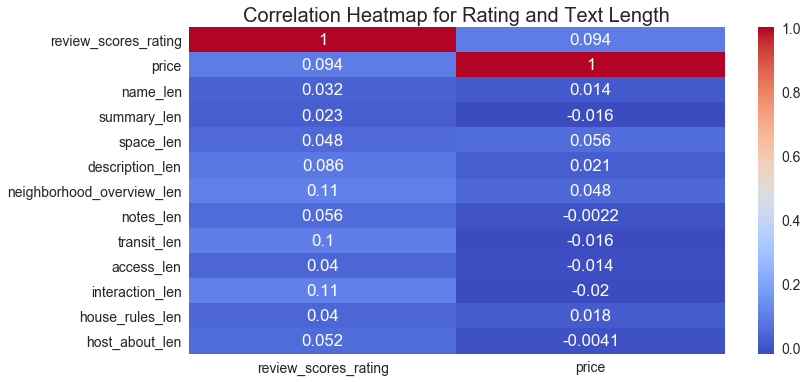

In [24]:
sns.set(font_scale = 1.4)
_ = plt.figure(figsize=(12,6))
g2 = sns.heatmap(listings[['review_scores_rating','price','name_len', 'summary_len', 'space_len', 'description_len', 'neighborhood_overview_len', 
            'notes_len', 'transit_len', 'access_len', 'interaction_len', 'house_rules_len', 'host_about_len']].corr()[['review_scores_rating','price']], cmap ='coolwarm',annot=True)
_ = plt.title('Correlation Heatmap for Rating and Text Length',fontsize=20)

It is interesting to see that there is no strong correlation with the length of columns like summary or description. I would assume that someone who puts more work effort in describing their proprty would put more effort in creating a better expereince for their customers, which would translate to higher reviews. This doesn't seem to be the case. There is a very low correlation between length of any text columns and the reviews